<a href="https://colab.research.google.com/github/PyBeginner1/CustomerGroupingMall/blob/main/MallCustomerDataMarketSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [51]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [52]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [54]:
data['Gender'] = data['Gender'].replace({'Male' : 1, 'Female' : 0})

In [55]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [56]:
data = data.drop('CustomerID', axis = 1)

In [57]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [58]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [59]:
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [60]:
max_clusters = 50

In [61]:
kmeans_tests = [KMeans(n_clusters = i, n_init = 10) for  i in range(1, max_clusters)]

inertias = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

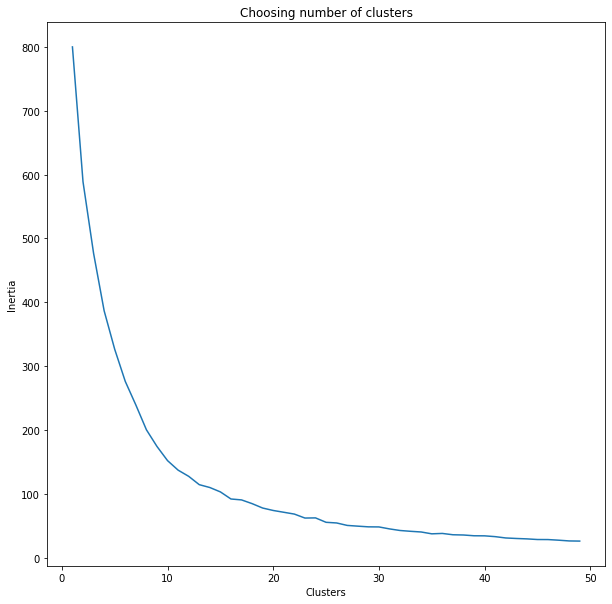

In [62]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, max_clusters), inertias)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Choosing number of clusters')
plt.show()

In [67]:
kmeans = KMeans(n_clusters = 10, n_init = 10)
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
clusters = kmeans.predict(scaled_data)
clusters

array([2, 2, 0, 8, 0, 8, 0, 8, 3, 8, 3, 8, 1, 8, 2, 2, 0, 2, 3, 8, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 8, 3, 8, 3, 2, 1, 8, 1, 8, 0, 8, 1, 2, 3, 0,
       1, 8, 1, 0, 0, 0, 1, 2, 0, 3, 1, 3, 1, 3, 0, 3, 3, 2, 1, 1, 3, 2,
       1, 1, 2, 0, 3, 1, 1, 1, 3, 2, 1, 2, 0, 1, 3, 2, 3, 1, 0, 3, 1, 0,
       0, 1, 1, 2, 3, 0, 0, 2, 1, 0, 3, 2, 0, 1, 3, 2, 3, 0, 1, 3, 3, 3,
       3, 0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 6, 0, 4, 9, 6, 9, 6, 9, 6,
       0, 4, 7, 4, 5, 6, 7, 4, 5, 6, 0, 4, 7, 6, 9, 4, 5, 6, 9, 6, 5, 4,
       5, 4, 7, 4, 7, 4, 5, 4, 7, 4, 9, 4, 9, 4, 5, 6, 9, 6, 7, 6, 5, 4,
       9, 6, 9, 6, 5, 4, 9, 4, 5, 6, 5, 6, 5, 4, 5, 4, 7, 4, 5, 4, 5, 6,
       7, 6], dtype=int32)

# Principal component analysis (PCA) --> To rduce Dimensionality

In [65]:
pca = PCA(n_components = 2)
reduced_data = pd.DataFrame(pca.fit_transform(scaled_data), columns = ['PC1', 'PC2'])
reduced_data

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [74]:
reduced_data['cluster'] = clusters

In [75]:
reduced_data

,PC1,PC2,cluster
0,-0.406383,-0.520714,2
1,-1.427673,-0.367310,2
2,0.050761,-1.894068,0
3,-1.694513,-1.631908,8
4,-0.313108,-1.810483,0
...,...,...,...
195,-1.179572,1.324568,4
196,0.672751,1.221061,5
197,-0.723719,2.765010,6
198,0.767096,2.861930,7


In [69]:
kmeans.cluster_centers_

array([[-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [-0.88640526,  1.09830638, -0.24158313, -0.04807901],
       [ 1.12815215, -0.97602698, -0.73705168,  0.41603773],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [-0.7425083 ,  0.16967696, -1.31640908, -1.1668652 ],
       [-0.88640526, -0.93245435, -1.29459798,  1.12360689],
       [ 1.12815215,  1.43505777, -0.45298304, -0.40195247],
       [-0.88640526,  0.35421988,  1.24912183, -1.14745442],
       [ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
       [-0.88640526, -0.7906297 , -0.09294256, -0.14202221]])

In [72]:
reduced_centers = pca.transform(kmeans.cluster_centers_)

In [73]:
reduced_centers

array([[-1.38150389,  0.3644368 ],
       [ 0.58233488, -0.85939176],
       [-0.68838314,  0.28733559],
       [ 1.19961046,  1.30582744],
       [ 0.75229959, -1.61087948],
       [-1.61307574, -1.33371367],
       [ 1.5303687 ,  0.17028966],
       [ 0.81659377,  0.24505923],
       [-0.88272588,  1.65431318],
       [-0.65343732, -0.55947734]])

# Data Visualization

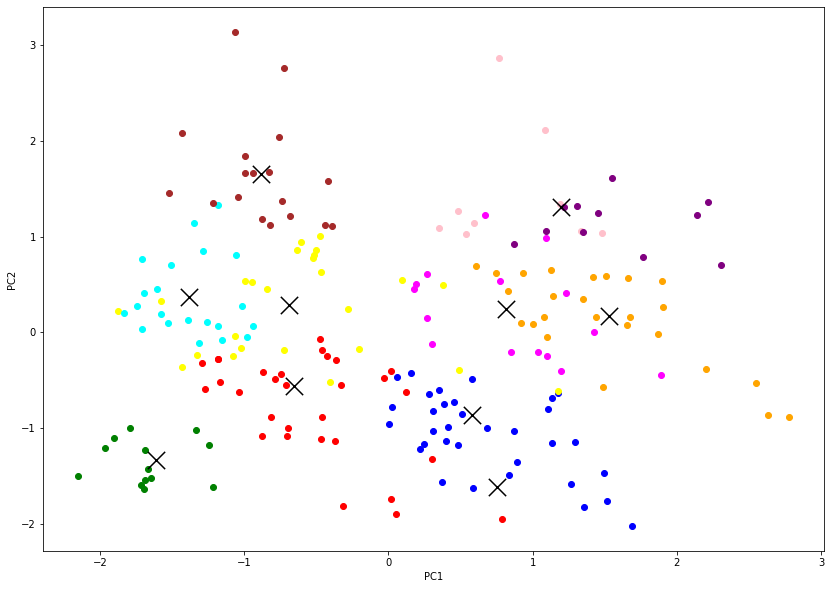

In [76]:
plt.figure(figsize=(14, 10))

plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC2'], color='red')
plt.scatter(reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC2'], color='blue')
plt.scatter(reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC2'], color='yellow')
plt.scatter(reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC2'], color='orange')
plt.scatter(reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC2'], color='cyan')
plt.scatter(reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC2'], color='magenta')
plt.scatter(reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC2'], color='brown')
plt.scatter(reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC2'], color='pink')
plt.scatter(reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC2'], color='green')
plt.scatter(reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC2'], color='purple')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()